In [2]:
import pandas as pd
import os.path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def format_csv(path : str = None, dataset_input : pd.DataFrame = None):
    if path is not None: dataset_input  = pd.read_csv(path)
    domains_unique = dataset_input['domain'].unique()
    output_dict = {'timestamp':list()}
    for domain in domains_unique: output_dict[domain]=list()
    for timestamp in dataset_input['timestamp'].unique():
        x = dataset_input.loc[dataset_input['timestamp'] == timestamp]
        output_dict['timestamp'].append(timestamp)
        for domain in domains_unique: 
            serie = x.loc[x['domain'] == domain]['measure']
            output_dict[domain].append(serie.iloc[0]) if len(serie)>0 else output_dict[domain].append(None)
    return pd.DataFrame(output_dict)

def merge_datasets(input_datasets : dict):
    for name, dataset in input_datasets.items(): dataset['dataset'] = name
    return pd.concat(input_datasets.values())

def delta_from_merge(merged_dataset : pd.DataFrame, delta_between : list):
    filtered_dataset = {}
    for dataset in delta_between:
        filtered_dataset[dataset] = dataset_merged.loc[dataset_merged['dataset'] == dataset]
    
    unique_keys = list(dataset_merged.keys())
    unique_keys.remove('timestamp')
    unique_keys.remove('dataset')
    pd.set_option('mode.chained_assignment', None)
    for key in unique_keys:
        filtered_dataset[delta_between[0]][key + '_delta'] = filtered_dataset[delta_between[1]][key] - filtered_dataset[delta_between[0]][key]
        filtered_dataset[delta_between[0]][key + '_delta%'] = (filtered_dataset[delta_between[0]][key + '_delta']/filtered_dataset[delta_between[1]][key])*100

    return filtered_dataset[delta_between[0]]

In [25]:
# Correct tornado datasets
dataset_list = ['consumption-' + str(level) + '%' for level in range(10,101,10)]
name = 'measures-stress/results-tornado/results-def/' + dataset_list[9]
dataset_formatted = pd.read_csv(name)
dataset_formatted.drop(dataset_formatted[dataset_formatted.timestamp >= 16000].index, inplace=True)
dataset_formatted.to_csv(name, index=False)

# Format datasets

## Tornado

In [63]:
root = 'measures-stress/results-tornado'
server_name = 'tornado'
folder_dict  = {'results-def':'default', 'results-singlesocket':'single-socket', 'results-smt':'smt'}
dataset_dict = {'consumption-' + str(level) + '%':level for level in range(10,101,10)}

In [9]:
raw_datasets     = list()
treated_datasets = list()
for folder, load_strategy in folder_dict.items():
    for file, process_usage in dataset_dict.items():
        path = root + '/' + folder + '/' + file
        # Raw dataset
        raw_dataset = pd.read_csv(path)
        raw_dataset['server'] = server_name
        raw_dataset['load_strategy'] = load_strategy
        raw_dataset['process_usage'] = process_usage
        raw_datasets.append(raw_dataset)
        # Formatted dataset
        treated_dataset = format_csv(path)
        treated_dataset['server'] = server_name
        treated_dataset['load_strategy'] = load_strategy
        treated_dataset['process_usage'] = process_usage
        treated_datasets.append(treated_dataset)

In [10]:
concat_raw     = pd.concat(raw_datasets)
concat_treated = pd.concat(treated_datasets)

concat_raw.to_csv(root + '/' + server_name + '-raw.csv', index=False)
concat_treated.to_csv(root + '/'  + server_name + '-treated.csv', index=False)

## Yeti

In [5]:
root = 'measures-stress/results-yeti'
server_name = 'yeti'
folder_dict  = {'results-def':'default', 'results-smt':'smt'}
dataset_dict = {'consumption-' + str(level) + '%':level for level in range(10,101,10)}

In [8]:
root = 'measures-stress/results-yeti-noc6'
server_name = 'yeti'
folder_dict  = {'results-def':'default'}
dataset_dict = {'consumption-' + str(level) + '%':level for level in range(30,101,10)}

In [51]:
# Repeat treatment cell and export cell in tornado section

## Gros

In [66]:
root = 'measures-stress/results-gros'
server_name = 'gros'
folder_dict  = {'results-def':'default', 'results-smt':'smt'}
dataset_dict = {'consumption-' + str(level) + '%':level for level in range(10,101,10)}

In [ ]:
# Repeat treatment cell and export cell in tornado section

# Load pre-treated dataset

In [3]:
tornado_raw   = pd.read_csv('measures-stress/results-tornado/tornado-raw.csv')
tornado_treat = pd.read_csv('measures-stress/results-tornado/tornado-treated.csv')
                            
yeti_raw   = pd.read_csv('measures-stress/results-yeti/yeti-raw.csv')
yeti_treat = pd.read_csv('measures-stress/results-yeti/yeti-treated.csv')
                            
gros_raw   = pd.read_csv('measures-stress/results-gros/gros-raw.csv')
gros_treat = pd.read_csv('measures-stress/results-gros/gros-treated.csv')

full_raw   = pd.concat([tornado_raw, yeti_raw, gros_raw])
full_treat = pd.concat([tornado_treat, yeti_treat, gros_treat])

In [21]:
yeti_raw   = pd.read_csv('measures-stress/results-yeti-noc6/yeti-raw.csv')
yeti_treat = pd.read_csv('measures-stress/results-yeti-noc6/yeti-treated.csv')

# Graphs

### Tornado

In [146]:
filtered_scatter.head()

,timestamp,package-1,core-0,package-0,core-1,package-global,cpu%_package-global,cpu%_package-1,freq_package-1,cpu%_package-0,freq_package-0,server,load_strategy,process_usage
2008,4,57.27133,0.00559,59.74675,0.00006,117.01809,0.42948,0.35309,1.794386e+06,0.49880,1.795059e+06,tornado,default,20
2009,8,58.51957,0.00347,61.01519,0.00002,119.53476,0.41106,0.33162,1.794913e+06,0.48913,1.795143e+06,tornado,default,20
2010,12,58.76837,0.00311,61.25208,0.00000,120.02045,0.40718,0.32501,1.795220e+06,0.47855,1.794904e+06,tornado,default,20
2011,16,58.90522,0.00401,61.36536,0.00007,120.27058,0.41400,0.33906,1.794917e+06,0.50384,1.794036e+06,tornado,default,20
2012,20,57.59252,0.00298,60.03112,0.00000,117.62363,0.40209,0.32608,1.795377e+06,0.48476,1.795069e+06,tornado,default,20


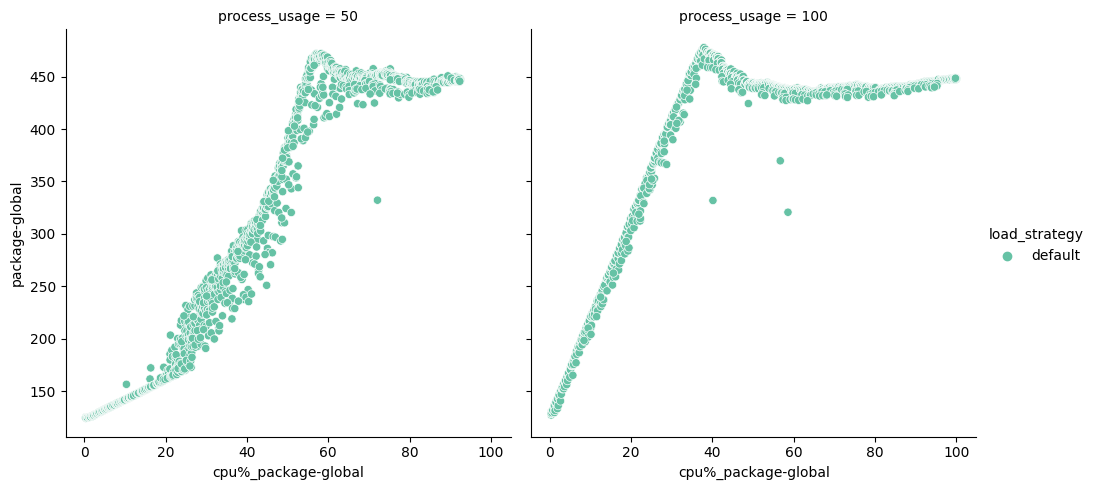

In [4]:
filtered_scatter = tornado_treat.loc[tornado_treat['process_usage'].isin([50,100])]

filtered_scatter = filtered_scatter.loc[filtered_scatter['load_strategy'].isin(['default'])]

palette = sns.color_palette("Set2", filtered_scatter['load_strategy'].nunique())

x = sns.relplot(data=filtered_scatter, x='cpu%_package-global', y='package-global',
                    col='process_usage', hue='load_strategy', style='load_strategy',
                    palette=palette)

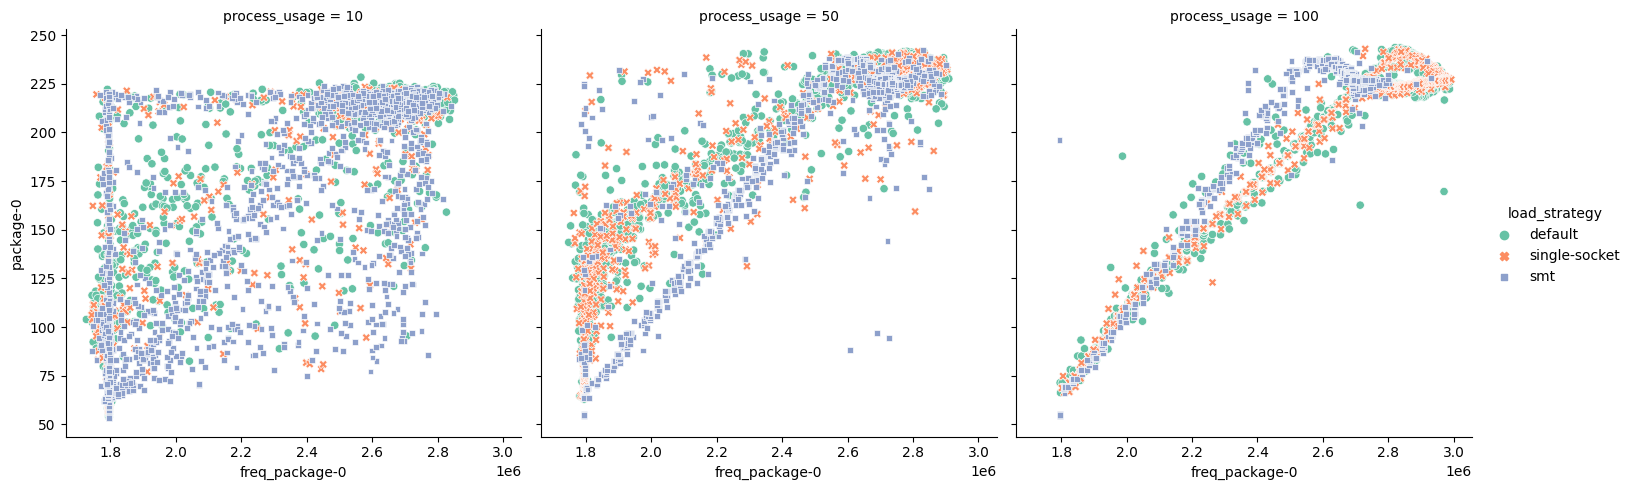

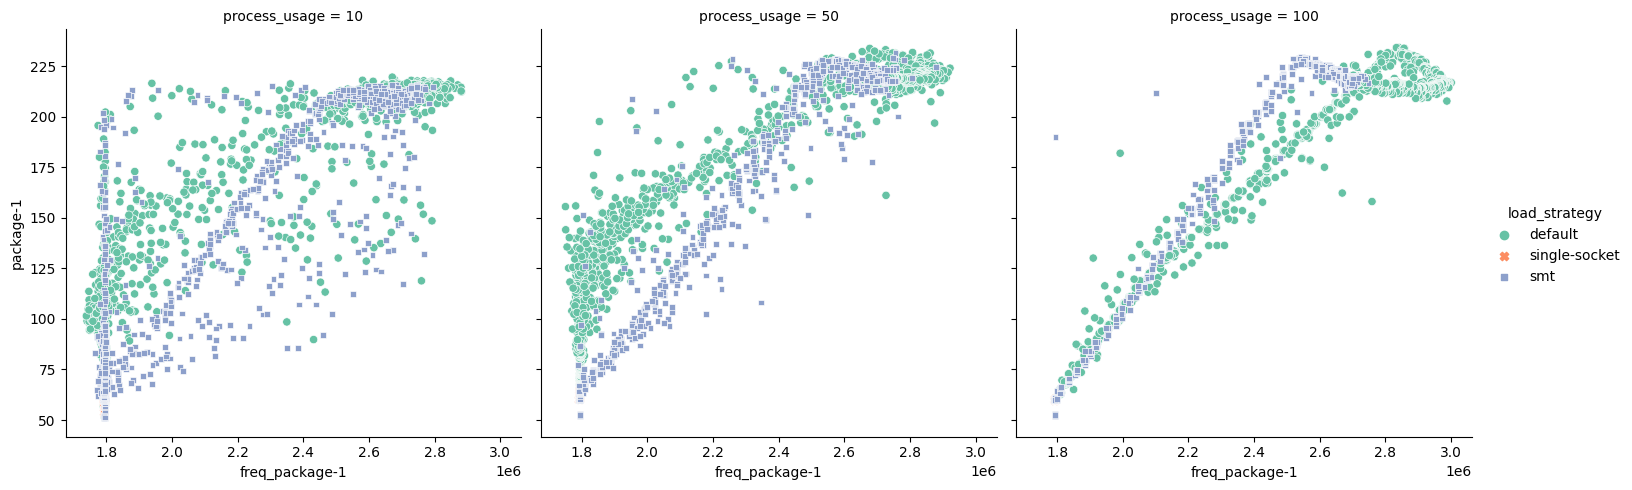

In [126]:
filtered_scatter = tornado_treat.loc[tornado_treat['process_usage'].isin([10,50,100])]
palette = sns.color_palette("Set2", filtered_scatter['load_strategy'].nunique())

x = sns.relplot(data=filtered_scatter, x='freq_package-0', y='package-0',
                    col='process_usage', hue='load_strategy', style='load_strategy',
                    palette=palette)
x = sns.relplot(data=filtered_scatter, x='freq_package-1', y='package-1',
                    col='process_usage', hue='load_strategy', style='load_strategy',
                    palette=palette)

### Yeti

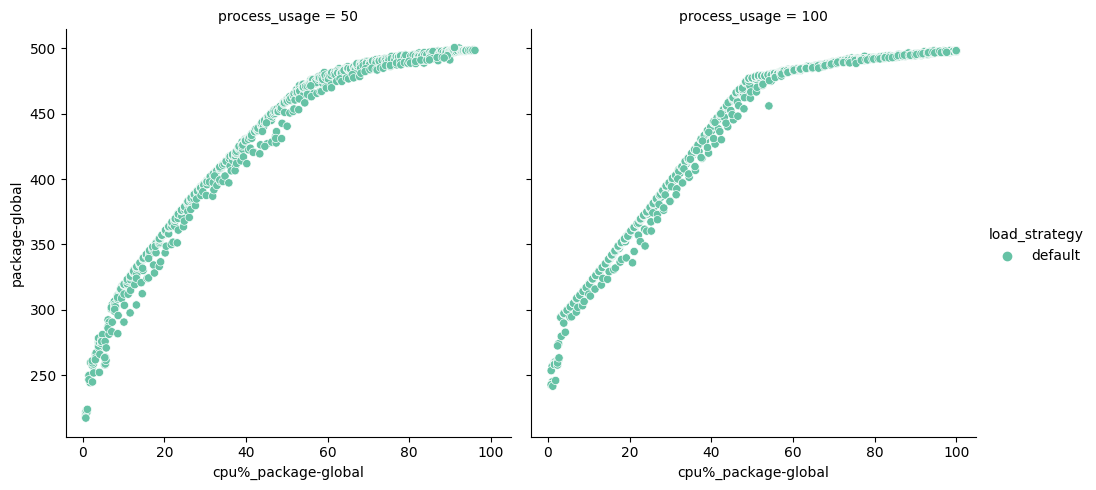

In [22]:
filtered_scatter = yeti_treat.loc[yeti_treat['process_usage'].isin([50,100])]
#filtered_scatter = filtered_scatter.loc[filtered_scatter['load_strategy'].isin(['default'])]

palette = sns.color_palette("Set2", filtered_scatter['load_strategy'].nunique())

x = sns.relplot(data=filtered_scatter, x='cpu%_package-global', y='package-global',
                    col='process_usage', hue='load_strategy', style='load_strategy',
                    palette=palette)

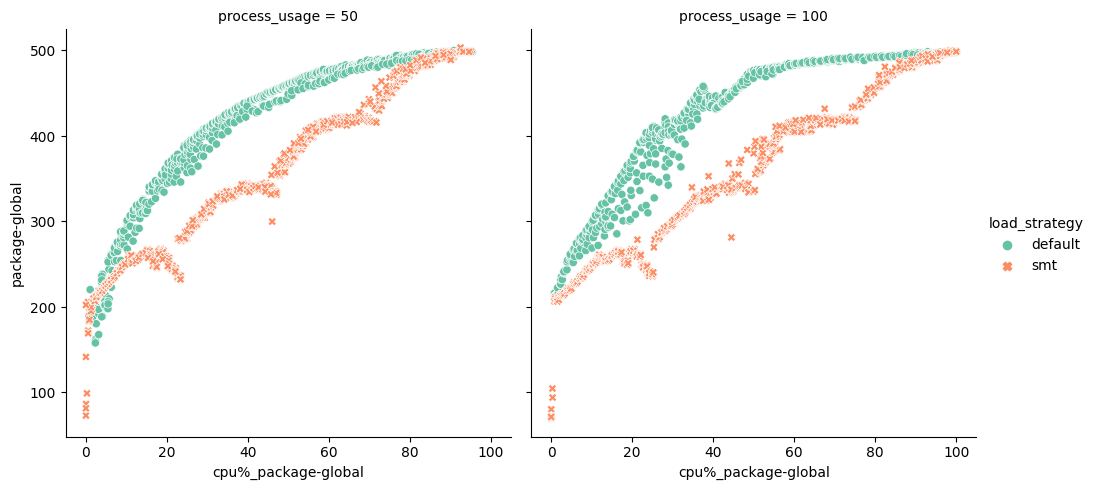

In [14]:
filtered_scatter = yeti_treat.loc[yeti_treat['process_usage'].isin([50,100])]
#filtered_scatter = filtered_scatter.loc[filtered_scatter['load_strategy'].isin(['default'])]

palette = sns.color_palette("Set2", filtered_scatter['load_strategy'].nunique())

x = sns.relplot(data=filtered_scatter, x='cpu%_package-global', y='package-global',
                    col='process_usage', hue='load_strategy', style='load_strategy',
                    palette=palette)

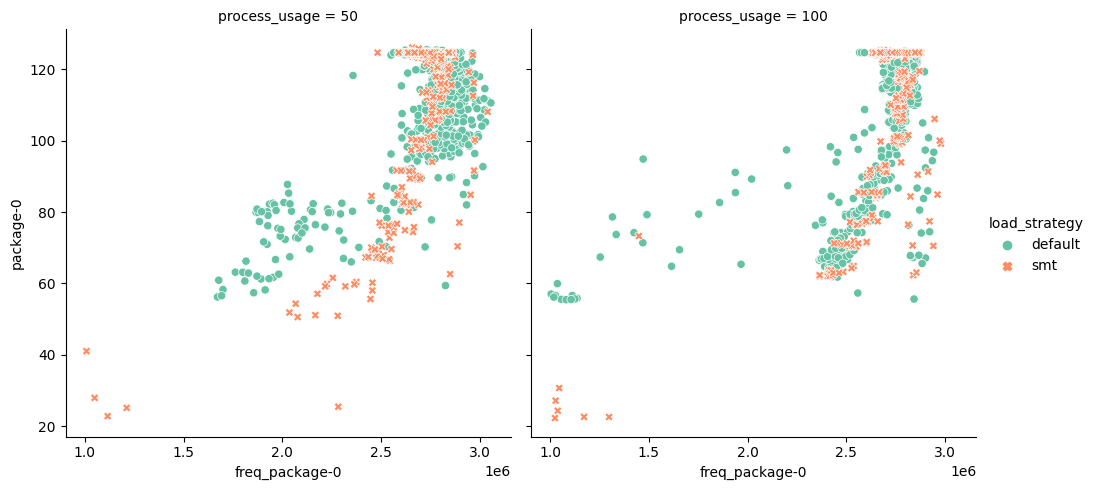

In [5]:
filtered_scatter = yeti_treat.loc[yeti_treat['process_usage'].isin([50,100])]
#filtered_scatter = filtered_scatter.loc[filtered_scatter['load_strategy'].isin(['default'])]

palette = sns.color_palette("Set2", filtered_scatter['load_strategy'].nunique())

x = sns.relplot(data=filtered_scatter, x='freq_package-0', y='package-0',
                    col='process_usage', hue='load_strategy', style='load_strategy',
                    palette=palette)

### Gros

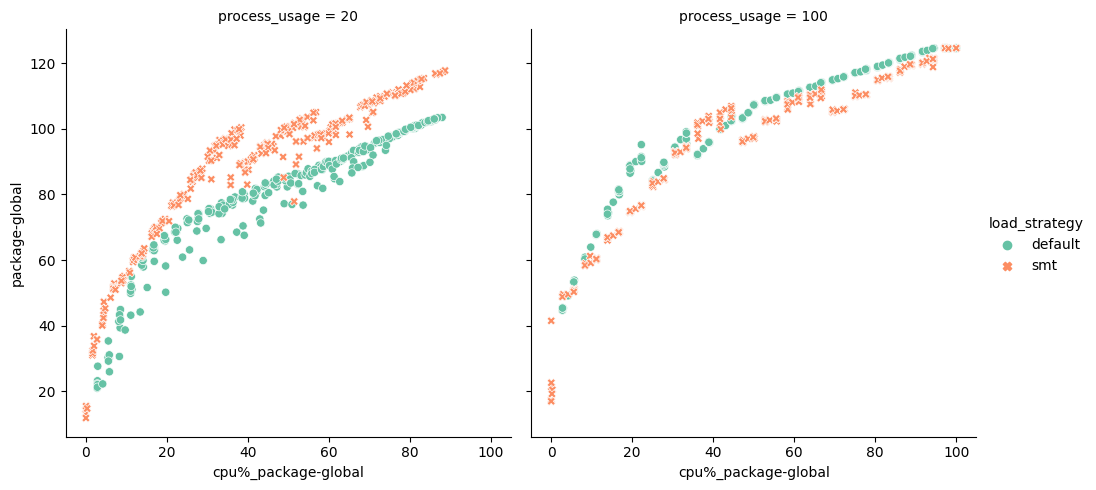

In [159]:
filtered_scatter = gros_treat.loc[gros_treat['process_usage'].isin([20,100])]
#filtered_scatter = filtered_scatter.loc[filtered_scatter['load_strategy'].isin(['default'])]

palette = sns.color_palette("Set2", filtered_scatter['load_strategy'].nunique())

x = sns.relplot(data=filtered_scatter, x='cpu%_package-global', y='package-global',
                    col='process_usage', hue='load_strategy', style='load_strategy',
                    palette=palette)

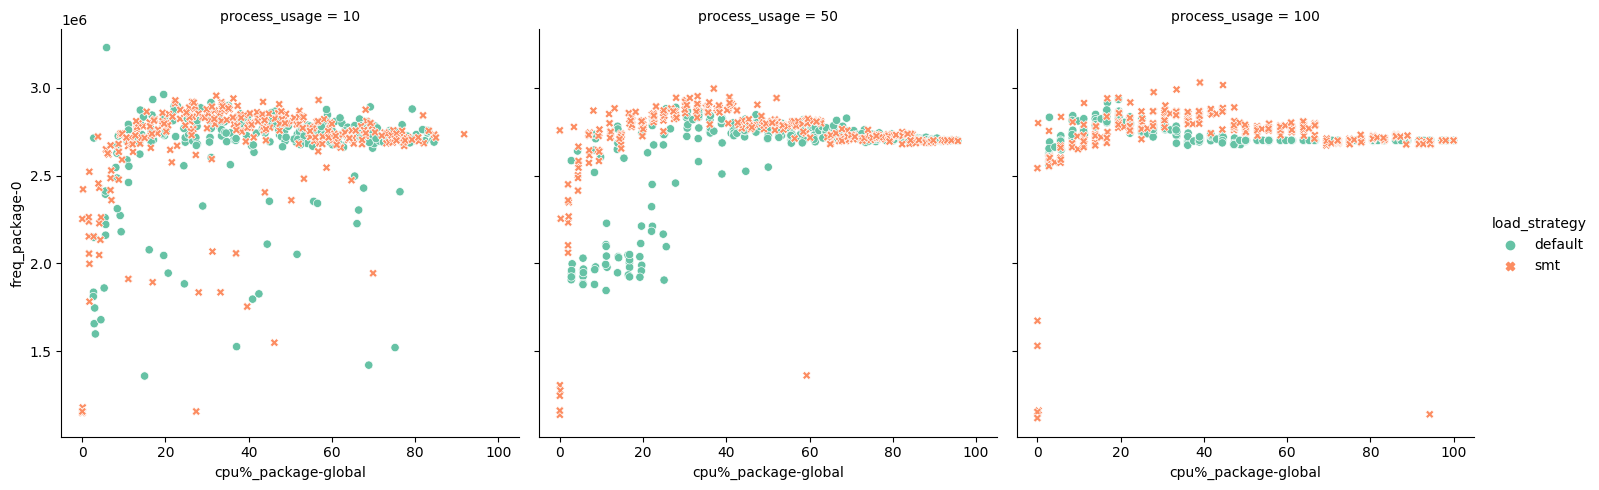

In [137]:
filtered_scatter = gros_treat.loc[gros_treat['process_usage'].isin([10,50,100])]
palette = sns.color_palette("Set2", filtered_scatter['load_strategy'].nunique())

x = sns.relplot(data=filtered_scatter, x='cpu%_package-global', y='freq_package-0',
                    col='process_usage', hue='load_strategy', style='load_strategy',
                    palette=palette)